# Data preprocessing 

#### import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# import tensorflow as tf

#### import the Dataset

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1460, 81)

In [5]:
pd.set_option("display.max_rows", 200)

#### check for missing data

In [6]:
train_df.isna().head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [7]:
len(train_df)

1460

In [8]:
missing_percent = train_df.isna().sum() /len(train_df) * 100 # gives null percentage per col
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending =False) # filters only columns with missing values & sorts them 
missing_percent 

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

#### shrink the df for simplicity 


In [9]:
train_df_d = train_df.loc[:,['LotArea', 'SaleCondition','SaleType','OverallQual','YearBuilt','GarageType','SalePrice']]
train_df_d

,LotArea,SaleCondition,SaleType,OverallQual,YearBuilt,GarageType,SalePrice
0,8450,Normal,WD,7,2003,Attchd,208500
1,9600,Normal,WD,6,1976,Attchd,181500
2,11250,Normal,WD,7,2001,Attchd,223500
3,9550,Abnorml,WD,7,1915,Detchd,140000
4,14260,Normal,WD,8,2000,Attchd,250000
...,...,...,...,...,...,...,...
1455,7917,Normal,WD,6,1999,Attchd,175000
1456,13175,Normal,WD,6,1978,Attchd,210000
1457,9042,Normal,WD,7,1941,Attchd,266500
1458,9717,Normal,WD,5,1950,Attchd,142125


In [10]:
train_df_d.isna().sum()

LotArea           0
SaleCondition     0
SaleType          0
OverallQual       0
YearBuilt         0
GarageType       81
SalePrice         0
dtype: int64

#### 2.Fill remaining categorical nulls with 'None'

In [11]:
print(train_df_d.select_dtypes(include=[np.object_]).isnull().sum().sort_values(ascending=False)) # calc categorical nulls

GarageType       81
SaleCondition     0
SaleType          0
dtype: int64


In [12]:
categorical_cols = train_df_d.select_dtypes(include =[np.object_]).columns
categorical_cols

Index(['SaleCondition', 'SaleType', 'GarageType'], dtype='object')

In [13]:
train_df_d[categorical_cols] = train_df_d[categorical_cols].fillna('None')
train_df_d.isna().sum()

LotArea          0
SaleCondition    0
SaleType         0
OverallQual      0
YearBuilt        0
GarageType       0
SalePrice        0
dtype: int64

#### 3.Fill numerical nulls (use median or 0 depending on meaning)

In [14]:
# calc numerical nulls
print(train_df_d.select_dtypes(include=[np.int64,np.float64]).isnull().sum().sort_values(ascending=False)) 

LotArea        0
OverallQual    0
YearBuilt      0
SalePrice      0
dtype: int64


In [15]:
numerical_cols = train_df_d.select_dtypes(include=[np.int64,np.float64])

In [16]:
for col in numerical_cols:
    if train_df_d[col].isna().sum() > 0:
        train_df_d[col] = train_df_d[col].fillna(train_df_d[col].median())

In [17]:
train_df_d.head()

,LotArea,SaleCondition,SaleType,OverallQual,YearBuilt,GarageType,SalePrice
0,8450,Normal,WD,7,2003,Attchd,208500
1,9600,Normal,WD,6,1976,Attchd,181500
2,11250,Normal,WD,7,2001,Attchd,223500
3,9550,Abnorml,WD,7,1915,Detchd,140000
4,14260,Normal,WD,8,2000,Attchd,250000


In [18]:
train_df_d.shape

(1460, 7)

In [19]:
train_df_d.columns


Index(['LotArea', 'SaleCondition', 'SaleType', 'OverallQual', 'YearBuilt',
       'GarageType', 'SalePrice'],
      dtype='object')

## 4.Encoding the Categorical Data to binary

**NOTE** : **_ONEHOTENCODER, ONLY ACCEPTS THE CATEGORICAL COLUMNS.THEN MANUALLY COMBINE IT WITH THE NUMERIC COLUMNS._**

In [20]:
##Step 1: Separate Target
Y = train_df.iloc[:,-1].values
X_raw= train_df_d.iloc[:,:-1]

In [21]:
print(Y)
print(X_raw)

[208500 181500 223500 ... 266500 142125 147500]
      LotArea SaleCondition SaleType  OverallQual  YearBuilt GarageType
0        8450        Normal       WD            7       2003     Attchd
1        9600        Normal       WD            6       1976     Attchd
2       11250        Normal       WD            7       2001     Attchd
3        9550       Abnorml       WD            7       1915     Detchd
4       14260        Normal       WD            8       2000     Attchd
...       ...           ...      ...          ...        ...        ...
1455     7917        Normal       WD            6       1999     Attchd
1456    13175        Normal       WD            6       1978     Attchd
1457     9042        Normal       WD            7       1941     Attchd
1458     9717        Normal       WD            5       1950     Attchd
1459     9937        Normal       WD            5       1965     Attchd

[1460 rows x 6 columns]


In [22]:
# Step 2: Separate Categorical & Numerical Columns
CatCol = X_raw.select_dtypes(include = 'object').columns
NumCol = X_raw.select_dtypes(exclude = 'object').columns

In [23]:
X_raw[CatCol].columns

Index(['SaleCondition', 'SaleType', 'GarageType'], dtype='object')

In [24]:
#Step 3: Encode Only Categorical Features
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse_output = False) #Returns array (not sparse matrix)
X_cat = OHE.fit_transform(X_raw[CatCol])
print(X_cat,X_cat.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (1460, 22)


In [25]:
# Step 4: Concatenate Numerical and Encoded Categorical
X_num =X_raw.select_dtypes(include = 'number').values
X = np.concatenate([X_num, X_cat], axis=1)
print(X,X.shape)

[[8.450e+03 7.000e+00 2.003e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [9.600e+03 6.000e+00 1.976e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.125e+04 7.000e+00 2.001e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [9.042e+03 7.000e+00 1.941e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [9.717e+03 5.000e+00 1.950e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [9.937e+03 5.000e+00 1.965e+03 ... 0.000e+00 0.000e+00 0.000e+00]] (1460, 25)


# VISUALIZE DATASET

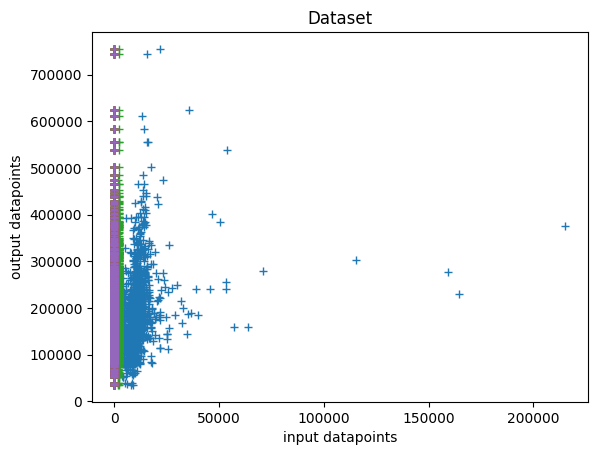

In [26]:
plt.plot(X,Y ,'+')
plt.xlabel("input datapoints")
plt.ylabel("output datapoints")
plt.title("Dataset")
plt.show()

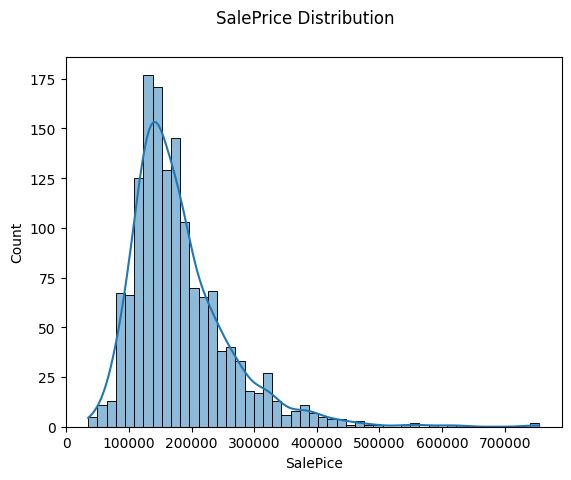

In [27]:
sns.histplot(Y,kde =True)
plt.suptitle("SalePrice Distribution")
plt.xlabel("SalePice")
plt.show()

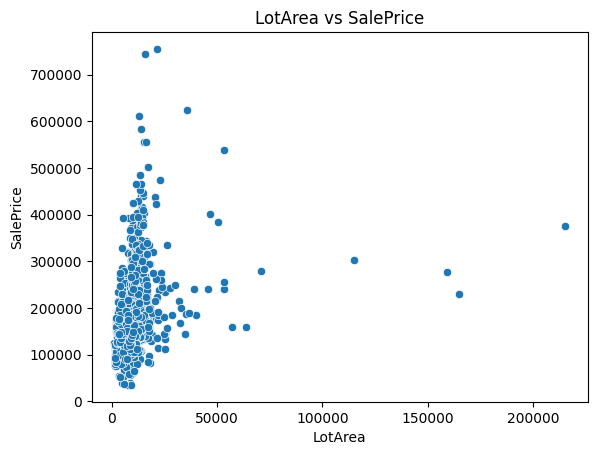

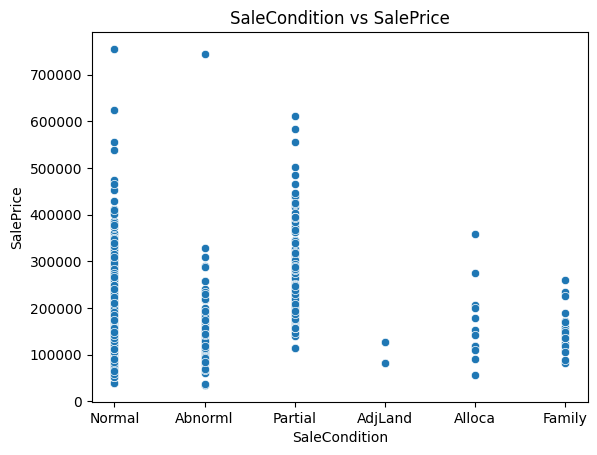

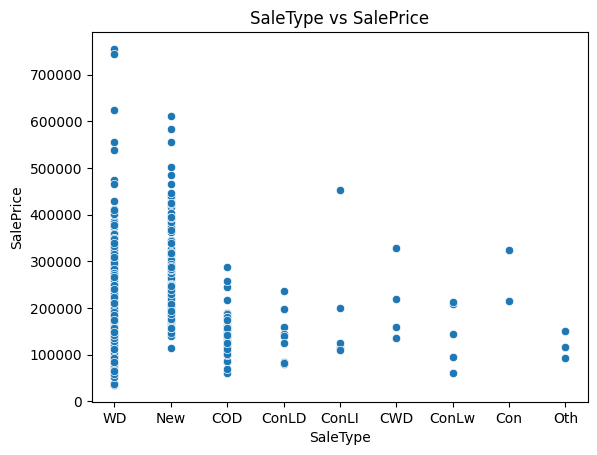

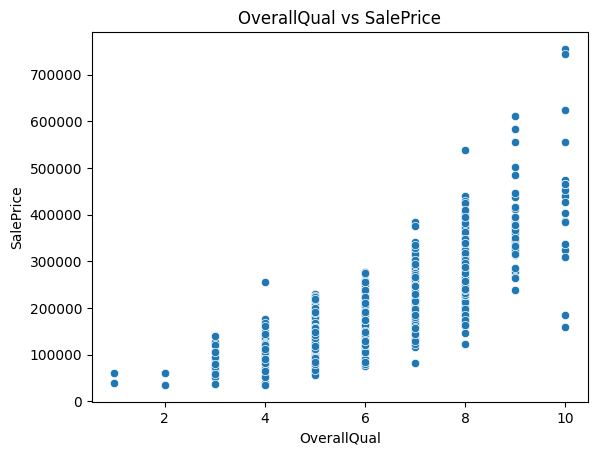

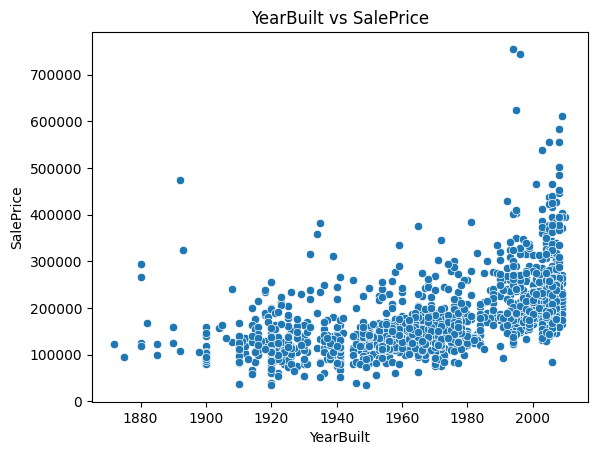

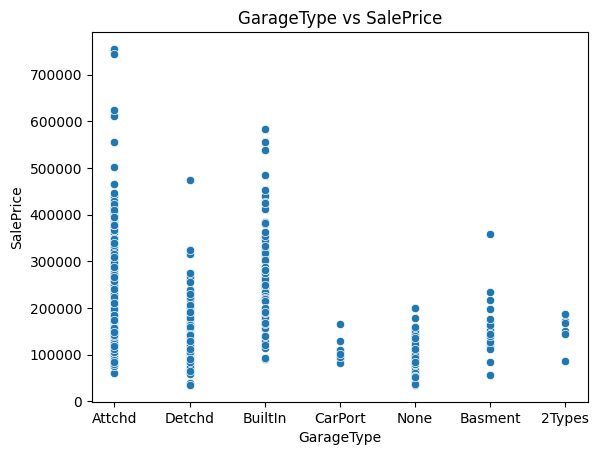

In [28]:
for col in train_df_d.columns.drop('SalePrice'):
    sns.scatterplot(x=train_df_d[col], y=train_df_d['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.show()


# BUILD LR MODEL

#### Training phase

In [42]:
from sklearn.model_selection import train_test_split 
xtrain , xtest ,ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state = 42)
from sklearn.linear_model import LinearRegression

In [43]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(1168, 25) (292, 25) (1168,) (292,)


In [44]:
LR = LinearRegression()# takes only 2d data
LR.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
LR.intercept_

np.float64(-286073.36601949483)

In [46]:
LR.coef_

array([ 1.29032006e+00,  3.71633879e+04,  1.17775157e+02,  3.98685086e+02,
       -1.18613978e+04,  3.99506356e+04, -1.68890882e+04,  7.00526485e+02,
       -1.22993613e+04, -2.22265585e+04, -1.04318161e+03,  2.52424567e+04,
       -1.83425110e+04, -1.21215222e+04, -3.00354570e+04,  3.21535182e+04,
        3.39069001e+04, -7.53364468e+03,  9.06032007e+03,  2.76529598e+03,
       -2.70617906e+03,  2.11242830e+04, -2.48253652e+03, -1.03977799e+04,
       -1.73634035e+04])

#### testing phase

In [47]:
y_pred = LR.predict(xtest)

# VISUALISE ACTUAL VS PREDICTED DATA

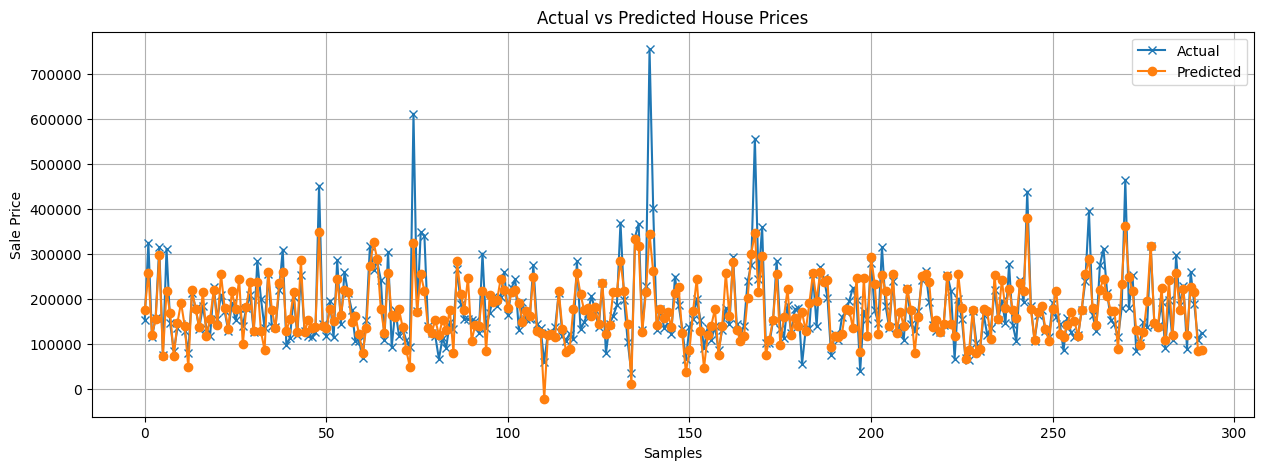

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(ytest,label='Actual', marker = 'x')
plt.plot(y_pred, label='Predicted', marker='o')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Samples')
plt.ylabel('Sale Price')
plt.legend()
plt.grid(True)
plt.savefig("Line_Plot.jpg",dpi=300)
plt.show()


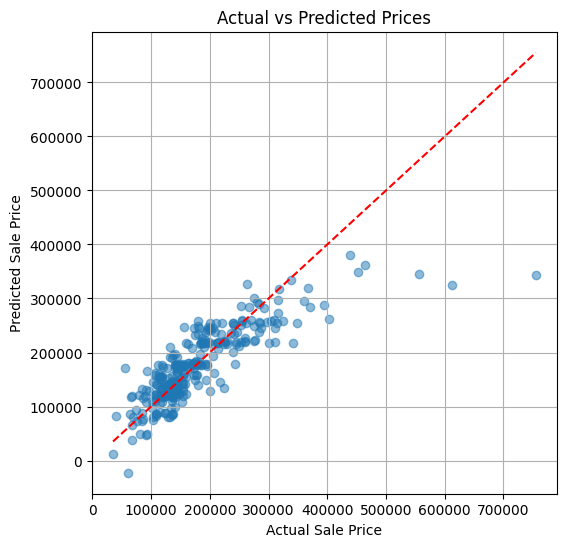

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(ytest, y_pred, alpha=0.5)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()],'r--')  # Diagonal reference line

# (1st arg)	These are X-values — the start and end points on the X-axis
# (2nd arg)	These are Y-values — the start and end points on the Y-axis

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.savefig("Scatter_Plot.jpg",dpi=300)
plt.show()


In [50]:
print(ytest.min(),ytest.max())

35311 755000


# MODEL EVALUATION

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [52]:
MSE = mean_squared_error(ytest,y_pred)
MAE = mean_absolute_error(ytest,y_pred)
r2= r2_score(ytest,y_pred)

In [53]:
print("MSE: {}".format(MSE))
print("MAE:{}".format(MAE))
print("R2 Score:{}".format(r2))

MSE: 2451075814.3428965
MAE:31919.971741669826
R2 Score:0.680446991674718


# save the trained model 

In [54]:
import joblib
joblib.dump(LR,"LR_HPP.pkl") 
joblib.dump(OHE,"encoder.pkl")

['encoder.pkl']

# other details

In [55]:
train_df_d.loc[:,'SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [56]:
train_df_d.loc[:,'SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [57]:
train_df_d.loc[:,'OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [58]:
train_df_d.loc[:,'GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)